# Challenge: Predict Future Temperature Trends
### You are given a dataset containing daily average temperatures for a city. Your task is to analyze the data and predict the temperature for the next 7 days using a simple forecasting method.
# Dataset:
You can create a synthetic dataset using the following Python code:
pythonCopyEditimport numpy as npimport pandas as pd
## Generate synthetic temperature datanp.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', periods=365, freq='D')

temperature = 20 + np.sin(np.linspace(0, 3.14 * 2, 365)) * 10 + np.random.randn(365) * 2# Create DataFramedf = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df.to_csv('temperature_data.csv', index=False)
df.head()

In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
df = pd.read_csv('temperature_data.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime

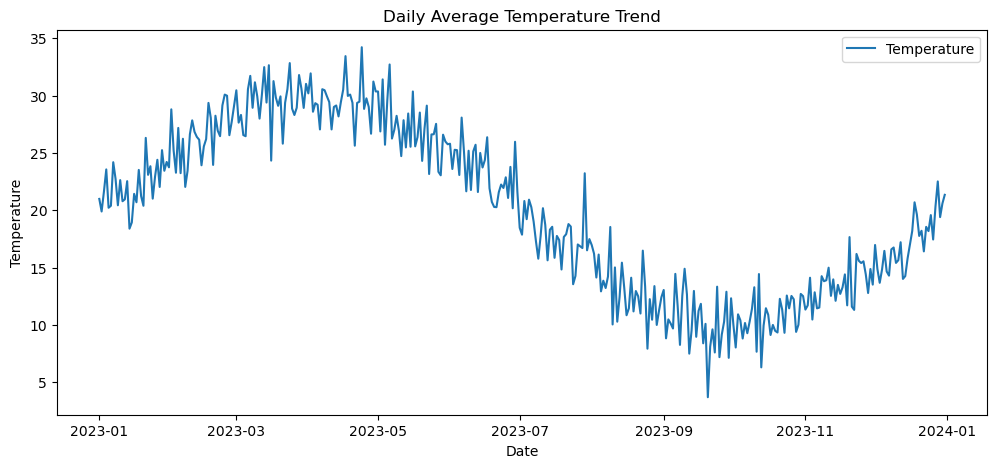

In [3]:
# Plot the temperature trend over time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Average Temperature Trend')
plt.legend()
plt.show()

In [4]:
# Naïve Forecasting Model (Assume tomorrow's temperature is the same as today's)
df['Naive_Prediction'] = df['Temperature'].shift(1)


In [5]:
# Moving Average Model (Predict using the average of the last 7 days)
df['Moving_Avg_Prediction'] = df['Temperature'].rolling(window=7).mean()


In [6]:
# Drop NaN values introduced by rolling mean
df.dropna(inplace=True)


In [7]:
# Fit ARIMA model
model = ARIMA(df['Temperature'], order=(5,1,0))
model_fit = model.fit()
 
# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

C:\Users\91991\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91991\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91991\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91991\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91991\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

In [8]:
# Evaluate models using Mean Absolute Error (MAE)
naive_mae = mean_absolute_error(df['Temperature'], df['Naive_Prediction'])
moving_avg_mae = mean_absolute_error(df['Temperature'], df['Moving_Avg_Prediction'])


In [9]:
print(f'MAE of Naïve Forecasting: {naive_mae:.2f}')
print(f'MAE of Moving Average Model: {moving_avg_mae:.2f}')


MAE of Naïve Forecasting: 2.22
MAE of Moving Average Model: 1.38


In [10]:
# Select the best model (Lower MAE is better)
best_model = 'Naïve' if naive_mae < moving_avg_mae else 'Moving Average'
print(f'Best performing model: {best_model}')

Best performing model: Moving Average


In [11]:
# Predict the next 7 days using the best model
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7, freq='D')

In [12]:
if best_model == 'Naïve':
    future_temperatures = [df['Temperature'].iloc[-1]] * 7  # Repeat last known value
else:
    future_temperatures = [df['Temperature'].iloc[-7:].mean()] * 7  # Use last 7-day average

In [13]:
# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Temperature': future_temperatures})

In [14]:

# Display the predictions
print(future_df)

        Date  Predicted_Temperature
0 2024-01-01              20.174216
1 2024-01-02              20.174216
2 2024-01-03              20.174216
3 2024-01-04              20.174216
4 2024-01-05              20.174216
5 2024-01-06              20.174216
6 2024-01-07              20.174216


In [15]:
# Print results
print(f"Best Model: ARIMA")
print(f"MAE (Naïve Forecast): {naive_mae:.4f}")
print(f"MAE (Moving Average): {moving_avg_mae:.4f}")
print(f"Predicted Temperatures for Next 7 Days: {forecast.tolist()}")

Best Model: ARIMA
MAE (Naïve Forecast): 2.2166
MAE (Moving Average): 1.3778
Predicted Temperatures for Next 7 Days: [19.948226268139305, 20.933424153348987, 20.770892889796, 20.38310286460699, 20.788689794154553, 20.638959430571695, 20.560460399180233]
